In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/cricket_shots_dataset.csv")

In [ ]:
df

,Sr. No.,Shot type (Front/back foot),Name of the shot played or attempted to play,Back lift Angle,Downswing Angle,Follow Through Angle,Bat Face Direction Angle,Back lift Direction Angle,Time to Impact (sec),Max. Bat Speed (km/h),Impact Bat Speed (km/h),Timing Index
0,1,Front,Hook Shot,174,183,122,4,25,0.34,26.02,25.145225,Missed - M
1,2,Back,Back Foot Defence,170,126,140,22,13,0.43,25.70,20.789158,Timed - T
2,3,Front,Back Foot Defence,158,137,123,6,26,0.46,20.74,18.156821,Late - L
3,4,Front,Pull Shot,179,133,128,8,14,0.26,32.19,30.885854,Late - L
4,5,Front,Hook Shot,172,121,179,14,25,0.19,30.05,25.068732,Timed - T
5,6,Back,Front Foot Defence,163,127,166,9,27,0.23,21.03,16.202903,Late - L
6,7,Front,Cover Drive,154,155,169,12,18,0.30,25.57,22.778533,Timed - T
7,8,Front,Hook Shot,123,121,125,6,16,0.44,38.17,33.756818,Early - E
8,9,Front,Pull Shot,173,123,173,19,28,0.45,24.79,23.846464,Timed - T
9,10,Back,Back Foot Defence,182,137,163,3,29,0.15,22.90,21.505643,Timed - T


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

# Load dataset
dummy_data = pd.read_csv('/content/cricket_shots_dataset.csv')  # Replace with your dataset path

# Drop irrelevant columns
dummy_data = dummy_data.drop(columns=['Sr. No.'])  # Remove non-informative identifier

# Encode categorical variables
label_encoder = LabelEncoder()
for col in dummy_data.select_dtypes(include=['object']).columns:
    dummy_data[col] = label_encoder.fit_transform(dummy_data[col])

# Split into features and target
X = dummy_data.drop(columns=['Timing Index'])
Y = dummy_data['Timing Index']

# Check class distribution
print("Class Distribution:\n", Y.value_counts())

# Balance the dataset by oversampling minority classes
data = pd.concat([X, Y], axis=1)
max_count = data['Timing Index'].value_counts().max()

balanced_data = pd.DataFrame()
for class_label in data['Timing Index'].unique():
    class_data = data[data['Timing Index'] == class_label]
    upsampled_class_data = resample(class_data,
                                    replace=True,
                                    n_samples=max_count,
                                    random_state=42)
    balanced_data = pd.concat([balanced_data, upsampled_class_data])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target from the balanced dataset
X_balanced = balanced_data.drop(columns=['Timing Index'])
Y_balanced = balanced_data['Timing Index']

# Scale the feature data
scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Split into train and test sets
X_train_bal, X_test_bal, Y_train_bal, Y_test_bal = train_test_split(
    X_balanced_scaled, Y_balanced, test_size=0.2, random_state=42, stratify=Y_balanced
)

# Initialize classifiers
models = {
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Support Vector Machine': SVC(kernel='rbf', C=1.0),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3)
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    scores = cross_val_score(model, X_train_bal, Y_train_bal, cv=5, scoring='accuracy')
    model.fit(X_train_bal, Y_train_bal)
    Y_pred = model.predict(X_test_bal)
    accuracy = accuracy_score(Y_test_bal, Y_pred)
    report = classification_report(Y_test_bal, Y_pred, zero_division=0)
    results[model_name] = {
        'cross_val_accuracy': scores.mean(),
        'test_accuracy': accuracy,
        'report': report
    }

# Display results
for model_name, result in results.items():
    print(f"{model_name} Cross-Validation Accuracy: {result['cross_val_accuracy']:.4f}")
    print(f"{model_name} Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"{model_name} Classification Report:\n{result['report']}\n")


Class Distribution:
 Timing Index
3    7
1    7
4    5
0    4
2    1
Name: count, dtype: int64
Training Random Forest...
Training Logistic Regression...
Training Support Vector Machine...
Training K-Nearest Neighbors...
Training Gradient Boosting...
Random Forest Cross-Validation Accuracy: 0.8133
Random Forest Test Accuracy: 0.8571
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         1

    accuracy                           0.86         7
   macro avg       0.90      0.90      0.87         7
weighted avg       0.93      0.86      0.86         7


Logistic Regression Cross-Validation Accuracy: 0.7067
Logistic Regression Test Accuracy: 0.8571
Logistic Regression Classification Report:


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model_names = list(results.keys())
test_accuracies = [result['test_accuracy'] for result in results.values()]
cross_val_accuracies = [result['cross_val_accuracy'] for result in results.values()]

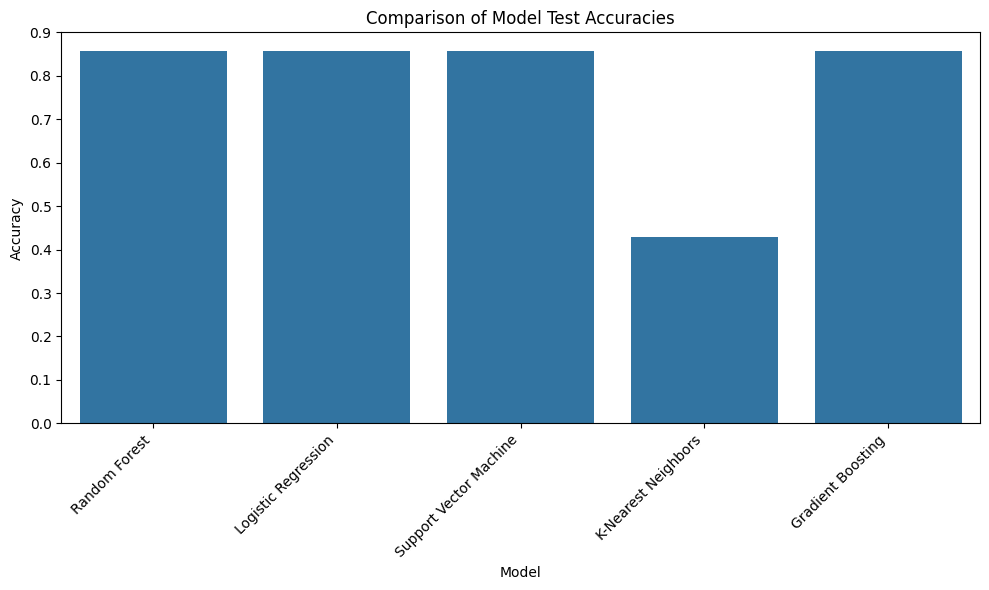

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=test_accuracies)
plt.title('Comparison of Model Test Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

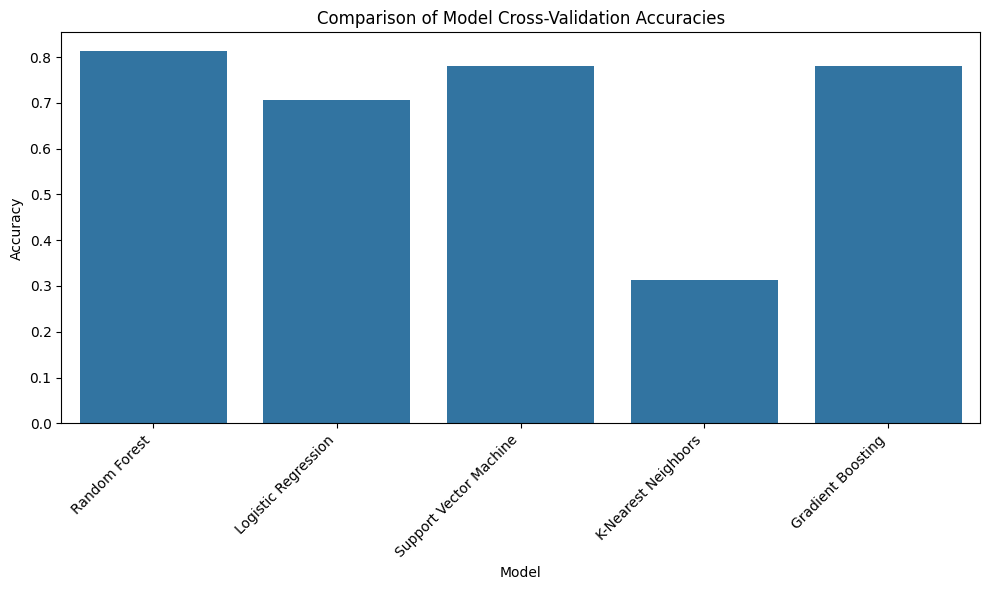

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=cross_val_accuracies)
plt.title('Comparison of Model Cross-Validation Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()